In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Wrangling

### The process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.


## The goal here is:

- To join two data files, one containing total enrollment of students according to race per school district and one containing total revenue per school district. 
- Add a district code key from a text file containing school district name, school district code, and zipcode. The district code here will serve as a key to connect with another dataset containing students outcome. 

The final dataset should contain the following columns: Agency name, district code, zipcode, seven colmns representing total enrollment according to race, total enrollment, total revenue and a new column containing revenue per student for each school district.

### Reading files:
1. Total enrollment according to race per school dsitrict:



In [2]:
df_enrollment = pd.read_csv('total_enrollment_per_race.csv', index_col=0)
df_enrollment.head()

,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment
0,ABC UNIFIED,63.0,1791.0,9425.0,1302.0,158.0,524.0,7459.0,20722.0
1,ACALANES UNION HIGH,9.0,95.0,508.0,3622.0,16.0,402.0,850.0,5502.0
2,ACKERMAN CHARTER,2.0,4.0,74.0,460.0,0.0,37.0,9.0,586.0
3,ACTON-AGUA DULCE UNIFIED,36.0,705.0,3466.0,4199.0,18.0,1040.0,536.0,10000.0
4,ADELANTO ELEMENTARY,35.0,2156.0,6327.0,1010.0,88.0,517.0,139.0,10272.0


2. Total revenue per school district:



In [3]:
df_revenue = pd.read_csv('total_revenue_per_district.csv', index_col=0)
df_revenue.head()

,Agency Name,State Name [District] Latest available year,Total Local Revenue,Total State Revenue,Total Federal Revenue,Total Revenue
0,ABC UNIFIED,California,171312000.0,39046000.0,15893000.0,226251000.0
1,ACALANES UNION HIGH,California,27481000.0,8624000.0,1605000.0,37710000.0
2,ACKERMAN CHARTER,California,3714000.0,473000.0,223000.0,4410000.0
3,ACTON-AGUA DULCE UNIFIED,California,25820000.0,2913000.0,1250000.0,29983000.0
4,ADELANTO ELEMENTARY,California,96654000.0,12463000.0,10906000.0,120023000.0


3. Text file containing district code, district name, and zipcode:



In [4]:
df_distcode = pd.read_csv('sb_ca2017entities_csv.txt')
df_distcode.head()

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,0,0,0,NaN,2017,4,State of California,NaN,NaN,
1,1,0,0,NaN,2017,5,Alameda,NaN,NaN,
2,1,10017,0,NaN,2017,6,Alameda,Alameda County Office Of Education,NaN,
3,1,10017,112607,NaN,2017,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612
4,1,10017,123968,NaN,2017,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606


### Joining enrollment dataset + total revenue per district:

In [6]:
# filtering only the last column of the revenue dataset

df_total_revenue = df_revenue.drop(df_revenue.columns[1:-1], axis = 1)
df_total_revenue.head()

,Agency Name,Total Revenue
0,ABC UNIFIED,226251000.0
1,ACALANES UNION HIGH,37710000.0
2,ACKERMAN CHARTER,4410000.0
3,ACTON-AGUA DULCE UNIFIED,29983000.0
4,ADELANTO ELEMENTARY,120023000.0


In [10]:
#df_enrollment_revenue = pd.merge(df_enrollment, df_total_revenue, left_index=True, right_index=True)
df_enrollment_revenue = pd.merge(df_enrollment, df_total_revenue, how='outer', on=['Agency Name'])
df_enrollment_revenue.head()

,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue
0,ABC UNIFIED,63.0,1791.0,9425.0,1302.0,158.0,524.0,7459.0,20722.0,226251000.0
1,ACALANES UNION HIGH,9.0,95.0,508.0,3622.0,16.0,402.0,850.0,5502.0,37710000.0
2,ACKERMAN CHARTER,2.0,4.0,74.0,460.0,0.0,37.0,9.0,586.0,4410000.0
3,ACTON-AGUA DULCE UNIFIED,36.0,705.0,3466.0,4199.0,18.0,1040.0,536.0,10000.0,29983000.0
4,ADELANTO ELEMENTARY,35.0,2156.0,6327.0,1010.0,88.0,517.0,139.0,10272.0,120023000.0


### Adding the column 'Revenue per student':

In [11]:
df_enrollment_revenue['Revenue per student'] = df_enrollment_revenue['Total Revenue']/df_enrollment_revenue['Total Enrollment']
df_enrollment_revenue['Revenue per student'] = round(df_enrollment_revenue['Revenue per student'], 2) 


df_enrollment_revenue.sort_values(by=['Agency Name'])
df_enrollment_revenue.head(35)

,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
0,ABC UNIFIED,63.0,1791.0,9425.0,1302.0,158.0,524.0,7459.0,20722.0,226251000.0,1.091840e+04
1,ACALANES UNION HIGH,9.0,95.0,508.0,3622.0,16.0,402.0,850.0,5502.0,37710000.0,6.853870e+03
2,ACKERMAN CHARTER,2.0,4.0,74.0,460.0,0.0,37.0,9.0,586.0,4410000.0,7.525600e+03
3,ACTON-AGUA DULCE UNIFIED,36.0,705.0,3466.0,4199.0,18.0,1040.0,536.0,10000.0,29983000.0,2.998300e+03
4,ADELANTO ELEMENTARY,35.0,2156.0,6327.0,1010.0,88.0,517.0,139.0,10272.0,120023000.0,1.168448e+04
5,ALAMEDA CNTY. STUDENT EXCHANGE PROG.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,ALAMEDA COUNTY OFFICE OF EDUCATION,16.0,543.0,1581.0,209.0,33.0,225.0,263.0,2870.0,55795000.0,1.944077e+04
7,ALAMEDA UNIFIED,33.0,924.0,1897.0,3292.0,85.0,1206.0,3722.0,11159.0,96642000.0,8.660450e+03
8,ALBANY CITY UNIFIED,5.0,117.0,603.0,1368.0,7.0,522.0,1080.0,3702.0,58211000.0,1.572420e+04
9,ALEXANDER VALLEY UNION ELEMENTARY,0.0,1.0,48.0,80.0,0.0,1.0,0.0,130.0,1123000.0,8.638460e+03


In [12]:
df_enrollment_revenue.tail(35)

,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
1180,WILMAR UNION ELEMENTARY,2.0,0.0,40.0,179.0,2.0,8.0,2.0,233.0,1226000.0,5261.80
1181,WILSONA ELEMENTARY,15.0,145.0,896.0,205.0,0.0,50.0,4.0,1315.0,16221000.0,12335.36
1182,WINDSOR UNIFIED,56.0,33.0,2648.0,2253.0,17.0,122.0,94.0,5223.0,41561000.0,7957.30
1183,WINSHIP-ROBBINS,4.0,2.0,245.0,395.0,0.0,74.0,20.0,740.0,2489000.0,3363.51
1184,WINTERS JOINT UNIFIED,4.0,23.0,1027.0,473.0,2.0,7.0,19.0,1555.0,16339000.0,10507.40
1185,WINTON,10.0,15.0,1692.0,144.0,0.0,5.0,76.0,1942.0,25475000.0,13117.92
1186,WISEBURN UNIFIED,9.0,616.0,2227.0,834.0,23.0,377.0,215.0,4301.0,66336000.0,15423.39
1187,WOODLAKE UNIFIED,6.0,6.0,1999.0,158.0,0.0,6.0,17.0,2192.0,30840000.0,14069.34
1188,WOODLAND JOINT UNIFIED,54.0,139.0,6843.0,2243.0,36.0,206.0,556.0,10077.0,97180000.0,9643.74
1189,WOODSIDE ELEMENTARY,0.0,9.0,45.0,283.0,7.0,41.0,15.0,400.0,14636000.0,36590.00


In [9]:
#df_enrollment_revenue.info

### Filter from the text file the following columns: distrtict code, district name, and zipcode

In [14]:
df_distcode.columns

Index(['County Code', 'District Code', 'School Code', 'Filler', 'Test Year',
       'Type Id', 'County Name', 'District Name', 'School Name', 'Zip Code'],
      dtype='object')

In [15]:
del_columns = ['County Code', 'School Code', 'Filler', 'Test Year', 'Type Id', 'County Name', 'School Name']
df_dist_code = df_distcode.drop(del_columns, 1)

In [16]:
df_del_dup = df_dist_code.drop_duplicates(['District Name'])
#df_del_dup.head()

In [17]:
df_sorted = df_del_dup.sort_values(by=['District Name'])
df_sorted['District Name'] = df_sorted['District Name'].str.upper()
df_sorted.head()

,District Code,District Name,Zip Code
2150,64212,ABC UNIFIED,
10231,70920,ABRAXIS CHARTER,95401
8630,68627,ACACIA ELEMENTARY CHARTER,95210
8629,68627,ACACIA MIDDLE CHARTER,95210
2930,64733,ACADEMIA MODERNA,90255


In [18]:
df_sorted['Zip Code'] = df_sorted['Zip Code'].apply(pd.to_numeric, errors='coerce')
df_sorted['Agency Name'] = df_sorted['District Name']

In [19]:
df_district = df_sorted[df_sorted['Zip Code'].isna()]

In [20]:
del df_district['Zip Code']
del df_district['District Name']

In [21]:
df_district.reset_index()

,index,District Code,Agency Name
0,2150,64212,ABC UNIFIED
1,611,61630,ACALANES UNION HIGH
2,5822,66761,ACKERMAN CHARTER
3,4363,75309,ACTON-AGUA DULCE UNIFIED
4,6955,67587,ADELANTO ELEMENTARY
5,2,10017,ALAMEDA COUNTY OFFICE OF EDUCATION
6,16,61119,ALAMEDA UNIFIED
7,38,61127,ALBANY CITY UNIFIED
8,10086,70599,ALEXANDER VALLEY UNION ELEMENTARY
9,4409,75713,ALHAMBRA UNIFIED


In [22]:
df_enrollment_revenue

,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
0,ABC UNIFIED,63.0,1791.0,9425.0,1302.0,158.0,524.0,7459.0,20722.0,226251000.0,10918.40
1,ACALANES UNION HIGH,9.0,95.0,508.0,3622.0,16.0,402.0,850.0,5502.0,37710000.0,6853.87
2,ACKERMAN CHARTER,2.0,4.0,74.0,460.0,0.0,37.0,9.0,586.0,4410000.0,7525.60
3,ACTON-AGUA DULCE UNIFIED,36.0,705.0,3466.0,4199.0,18.0,1040.0,536.0,10000.0,29983000.0,2998.30
4,ADELANTO ELEMENTARY,35.0,2156.0,6327.0,1010.0,88.0,517.0,139.0,10272.0,120023000.0,11684.48
5,ALAMEDA CNTY. STUDENT EXCHANGE PROG.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,ALAMEDA COUNTY OFFICE OF EDUCATION,16.0,543.0,1581.0,209.0,33.0,225.0,263.0,2870.0,55795000.0,19440.77
7,ALAMEDA UNIFIED,33.0,924.0,1897.0,3292.0,85.0,1206.0,3722.0,11159.0,96642000.0,8660.45
8,ALBANY CITY UNIFIED,5.0,117.0,603.0,1368.0,7.0,522.0,1080.0,3702.0,58211000.0,15724.20
9,ALEXANDER VALLEY UNION ELEMENTARY,0.0,1.0,48.0,80.0,0.0,1.0,0.0,130.0,1123000.0,8638.46


### Merging the two main datasets:

In [23]:
df_merged_district = pd.merge(df_district, df_enrollment_revenue, how='outer', on=['Agency Name'])
df_merged_district.head(50)

,District Code,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
0,64212.0,ABC UNIFIED,63.0,1791.0,9425.0,1302.0,158.0,524.0,7459.0,20722.0,226251000.0,10918.40
1,61630.0,ACALANES UNION HIGH,9.0,95.0,508.0,3622.0,16.0,402.0,850.0,5502.0,37710000.0,6853.87
2,66761.0,ACKERMAN CHARTER,2.0,4.0,74.0,460.0,0.0,37.0,9.0,586.0,4410000.0,7525.60
3,75309.0,ACTON-AGUA DULCE UNIFIED,36.0,705.0,3466.0,4199.0,18.0,1040.0,536.0,10000.0,29983000.0,2998.30
4,67587.0,ADELANTO ELEMENTARY,35.0,2156.0,6327.0,1010.0,88.0,517.0,139.0,10272.0,120023000.0,11684.48
5,10017.0,ALAMEDA COUNTY OFFICE OF EDUCATION,16.0,543.0,1581.0,209.0,33.0,225.0,263.0,2870.0,55795000.0,19440.77
6,61119.0,ALAMEDA UNIFIED,33.0,924.0,1897.0,3292.0,85.0,1206.0,3722.0,11159.0,96642000.0,8660.45
7,61127.0,ALBANY CITY UNIFIED,5.0,117.0,603.0,1368.0,7.0,522.0,1080.0,3702.0,58211000.0,15724.20
8,70599.0,ALEXANDER VALLEY UNION ELEMENTARY,0.0,1.0,48.0,80.0,0.0,1.0,0.0,130.0,1123000.0,8638.46
9,75713.0,ALHAMBRA UNIFIED,33.0,112.0,7071.0,349.0,16.0,406.0,9084.0,17071.0,250138000.0,14652.80


In [32]:
df_merged_district=df_merged_district.dropna()

In [33]:
df_merged_district.loc[df_merged_district['District Code'] == 10157]

,District Code,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
413,10157.0,KERN COUNTY OFFICE OF EDUCATION,25.0,257.0,2855.0,1092.0,6.0,73.0,81.0,4389.0,303202000.0,69082.25


In [34]:
df_merged_district.to_csv('total_enrollment_per_race_with_districtcode.csv')

In [36]:
# Need to clean missing data, outliers, etc as we can see below

df_merged_district.sort_values(by=['Agency Name']).isnull().sum()

District Code                      0
Agency Name                        0
American Indian/Alaska Native      0
Black                              0
Hispanic                           0
White                              0
Hawaiian Nat./Pacific Isl.         0
Two or More Races                  0
Asian or Asian/Pacific Islander    0
Total Enrollment                   0
Total Revenue                      0
Revenue per student                0
dtype: int64

----------

# Exploratory Data Analysis - EDA

### In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [37]:
df_merged_district.shape

(1033, 12)

In 2019-2020 there was 1,037 school districts in California. See the California Department of Education article below.
https://www.cde.ca.gov/ds/sd/cb/ceffingertipfacts.asp

It appears that in 2015 there was around 977 school districts in California. See article from Ballotpedia.
https://ballotpedia.org/List_of_school_districts_in_California

Our dataset got 1005 school districts which so far appears to be a reasonable expectation for the year of 2017.

In [38]:
# checking for NaNs
df_merged_district.isna().sum()

District Code                      0
Agency Name                        0
American Indian/Alaska Native      0
Black                              0
Hispanic                           0
White                              0
Hawaiian Nat./Pacific Isl.         0
Two or More Races                  0
Asian or Asian/Pacific Islander    0
Total Enrollment                   0
Total Revenue                      0
Revenue per student                0
dtype: int64

In [39]:
df_merged_district['Revenue per student'] = df_merged_district['Revenue per student'].replace(np.inf, np.nan)

In [40]:
df_merged_district['Revenue per student'].isna().sum()

2

In [41]:
df_district = df_merged_district.dropna()
df_district['Revenue per student'].isna().sum()

0

### Exploring REVENUE PER STUDENT

In [42]:
# the standard deviation indicates that there's likely very large values on the column 'Revenue per student'
# Probably because we have missing data for total enrollment
# We need to clean the dataset -- one way is to drop 

mean = np.mean(df_district['Revenue per student'])
std = np.std(df_district['Revenue per student'])
median = np.median(df_district['Revenue per student'])

print('mean: ', mean)
print('standard deviation: ', std)
print('median: ', median)

mean:  26686.1065179
standard deviation:  185882.179668
median:  9789.18


In [43]:
# counts the number of zeroes per row in the dataset
df_district.isin([0]).sum()

District Code                        0
Agency Name                          0
American Indian/Alaska Native      141
Black                              166
Hispanic                             6
White                                6
Hawaiian Nat./Pacific Isl.         335
Two or More Races                   48
Asian or Asian/Pacific Islander    137
Total Enrollment                     0
Total Revenue                       21
Revenue per student                 21
dtype: int64



Q: There are 21 rows containing zeroes for Total Revenue, consequently for Revenue per student -- we could perhaps input the median for revenue per student for these?

---------


In [44]:
# replace zeroes in revenueper student with the median
df_district['Revenue per student'].replace(to_replace=0, value = df_district['Revenue per student'].median(), inplace = True)

#df_district['Revenue per student'] = df_district['Revenue per student'].replace(0, 9795.73)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
df_district.isin([0]).sum()

District Code                        0
Agency Name                          0
American Indian/Alaska Native      141
Black                              166
Hispanic                             6
White                                6
Hawaiian Nat./Pacific Isl.         335
Two or More Races                   48
Asian or Asian/Pacific Islander    137
Total Enrollment                     0
Total Revenue                       21
Revenue per student                  0
dtype: int64

In [46]:
df_district['Revenue per student'].sort_values(ascending=False)

388     4708916.67
182     2919750.00
389     1600750.00
458      885615.38
813      686179.17
441      542441.18
798      472842.54
542      439690.14
602      369639.71
789      322270.83
825      320780.00
526      294525.82
892      286967.37
697      243681.82
562      216757.58
888      206227.13
375      182029.08
449      167709.58
795      166361.92
240      161703.55
707      145347.10
720      143043.48
419      135532.97
937      124480.77
548      114218.30
872      107793.92
370      107392.20
928      103702.58
498      102577.51
527      100166.67
           ...    
138        3999.12
254        3877.47
809        3812.90
639        3749.26
975        3733.11
842        3602.31
359        3542.57
590        3528.22
572        3493.95
206        3428.57
840        3382.85
1029       3363.51
990        3069.82
3          2998.30
392        2728.94
360        2428.71
698        1910.89
82         1899.77
404        1878.14
909        1770.65
525        1650.05
551        1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ae90557b8>]], dtype=object)

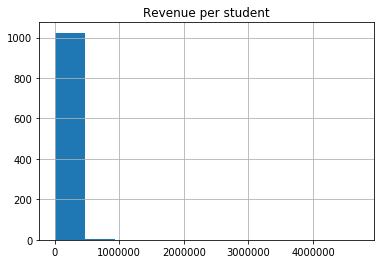

In [47]:
# need to figure this out
data = df_district['Revenue per student']
binwidth = (data.max() - data.min()) / 10
df_district.hist(column='Revenue per student', bins=np.arange(min(data), max(data) + binwidth, binwidth))

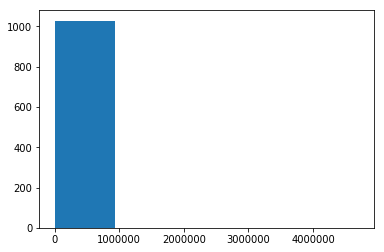

In [48]:
_ = plt.hist(df_district['Revenue per student'], bins=5)

### Exploring TOTAL ENROLLMENT

In [49]:
# what's the total enrollment

mean = np.mean(df_district['Total Enrollment'])
std = np.std(df_district['Total Enrollment'])
median = np.median(df_district['Total Enrollment'])

print('mean: ', mean)
print('standard deviation: ', std)
print('median: ', median)

mean:  6082.91755577
standard deviation:  21901.2717374
median:  1870.0


In [50]:
df_district['Total Enrollment'].sort_values(ascending=True)

182          4.0
677          6.0
174          7.0
282         10.0
378         11.0
484         11.0
328         11.0
81          11.0
880         11.0
522         12.0
388         12.0
387         12.0
478         12.0
969         12.0
389         12.0
407         13.0
458         13.0
650         14.0
952         14.0
250         15.0
586         16.0
438         17.0
377         17.0
70          18.0
365         18.0
865         19.0
1024        19.0
215         19.0
84          20.0
277         21.0
          ...   
489      30797.0
1004     31136.0
596      31803.0
964      31979.0
803      32004.0
821      32376.0
579      33352.0
381      33373.0
292      35163.0
731      35872.0
279      38014.0
414      38705.0
930      40671.0
915      40981.0
764      42706.0
170      42746.0
303      44223.0
780      46737.0
804      49253.0
635      49709.0
190      53005.0
791      53152.0
134      53613.0
824      54505.0
799      60133.0
248      62552.0
297      73356.0
494      76428

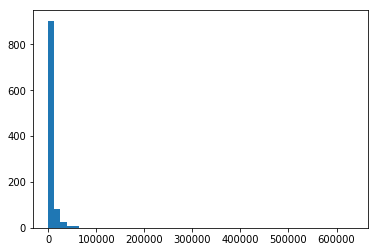

In [51]:
# Need to figure this out


_ = plt.hist(df_district['Total Enrollment'], bins = 50)

In [52]:
df_district


,District Code,Agency Name,American Indian/Alaska Native,Black,Hispanic,White,Hawaiian Nat./Pacific Isl.,Two or More Races,Asian or Asian/Pacific Islander,Total Enrollment,Total Revenue,Revenue per student
0,64212.0,ABC UNIFIED,63.0,1791.0,9425.0,1302.0,158.0,524.0,7459.0,20722.0,226251000.0,10918.40
1,61630.0,ACALANES UNION HIGH,9.0,95.0,508.0,3622.0,16.0,402.0,850.0,5502.0,37710000.0,6853.87
2,66761.0,ACKERMAN CHARTER,2.0,4.0,74.0,460.0,0.0,37.0,9.0,586.0,4410000.0,7525.60
3,75309.0,ACTON-AGUA DULCE UNIFIED,36.0,705.0,3466.0,4199.0,18.0,1040.0,536.0,10000.0,29983000.0,2998.30
4,67587.0,ADELANTO ELEMENTARY,35.0,2156.0,6327.0,1010.0,88.0,517.0,139.0,10272.0,120023000.0,11684.48
5,10017.0,ALAMEDA COUNTY OFFICE OF EDUCATION,16.0,543.0,1581.0,209.0,33.0,225.0,263.0,2870.0,55795000.0,19440.77
6,61119.0,ALAMEDA UNIFIED,33.0,924.0,1897.0,3292.0,85.0,1206.0,3722.0,11159.0,96642000.0,8660.45
7,61127.0,ALBANY CITY UNIFIED,5.0,117.0,603.0,1368.0,7.0,522.0,1080.0,3702.0,58211000.0,15724.20
8,70599.0,ALEXANDER VALLEY UNION ELEMENTARY,0.0,1.0,48.0,80.0,0.0,1.0,0.0,130.0,1123000.0,8638.46
9,75713.0,ALHAMBRA UNIFIED,33.0,112.0,7071.0,349.0,16.0,406.0,9084.0,17071.0,250138000.0,14652.80


### Exploring TOTAL REVENUE

In [53]:
# Is the result in millions???

mean = np.mean(df_district['Total Enrollment'])
std = np.std(df_district['Total Enrollment'])
median = np.median(df_district['Total Enrollment'])

print('mean: ', mean)
print('standard deviation: ', std)
print('median: ', median)

mean:  6082.91755577
standard deviation:  21901.2717374
median:  1870.0
